<h1>Topic Modelling (sklearn NMF)</h1>
<p>Topic Modeling is an unsupervised learning approach to clustering documents, to discover topics based on their contents.</p>

In [1]:
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('../result_sentiment.csv')
df

,platform,date,body,token_words,lemmatized,clean_body,label,scores,compound,sentiment_type
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"['adidas', 'yeezy', 'boost', 'dazzling', 'blue...","['adidas', 'yeezy', 'boost', 'dazzling', 'blue...",yeezy boost dazzling blue coming yankeekicks ig,adidas,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,POSITIVE
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"['worst', 'omicron', 'alhumdullilah', 'cupcake...","['worst', 'omicron', 'alhumdullilah', 'cupcake...",worst omicron alhumdullilah cupcake breakfast ...,adidas,"{'neg': 0.232, 'neu': 0.452, 'pos': 0.316, 'co...",0.1280,POSITIVE
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"['blessing', 'follower', 'life', 'changing', '...","['blessing', 'follower', 'life', 'changing', '...",blessing follower life changing nfts hour orig...,adidas,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4939,POSITIVE
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"['south', 'park', 'adidas', 'professor', 'chao...","['south', 'park', 'adidas', 'professor', 'chao...",south park professor chaos nmd releasing,adidas,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp...",-0.5719,NEGATIVE
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","['patronise', 'sell', 'adidas', 'shoes', 'fake...","['patronise', 'sell', 'adidas', 'shoe', 'fake'...",patronise sell shoe fake walk fast notice,adidas,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"['jus', 'hk', 'adidas', 'factory', 'outlet', '...","['jus', 'hk', 'adidas', 'factory', 'outlet', '...",jus hk factory outlet location block hong kon...,adidas,"{'neg': 0.068, 'neu': 0.8, 'pos': 0.132, 'comp...",0.4019,POSITIVE
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"['hubby', 'citygate', 'leh', 'polo', 'ralph', ...","['hubby', 'citygate', 'leh', 'polo', 'ralph', ...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...",0.4939,POSITIVE
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","['helpp', 'toronto', 'hong', 'kong', 'december...","['helpp', 'toronto', 'hong', 'kong', 'december...",helpp toronto hong kong december long wanna sh...,nike,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.8126,POSITIVE
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"['hihi', 'wanna', 'post', 'guide', 'monkey', '...","['hihi', 'wanna', 'post', 'guide', 'monkey', '...",hihi wanna post guide monkey post addidas shi...,nike,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [3]:
no_of_words = df['clean_body'].apply(lambda x: len(str(x).split(' ')))
avg = round(no_of_words.sum()/len(no_of_words), 2)
print("Average no of words for each row: ", avg)

Average no of words for each row:  16.31


<h2>CountVectorizer</h2>

In [4]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=25)
# tfidf = tfidf_vectorizer.fit_transform(df['clean_body'].astype('U'))
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()
# tfidf_feature_names

vectorizer = CountVectorizer(max_df=0.9, min_df=25, analyzer='word')
tf = vectorizer.fit_transform(df['clean_body'].astype('U')).toarray()
tf_feature_names = vectorizer.get_feature_names_out()
tf_feature_names

array(['absolute', 'absolutely', 'accept', ..., 'zoom', 'zoomx', 'zx'],
      dtype=object)

In [5]:
len(tf_feature_names)

1697

<h2>NMF</h2>

In [6]:
nmf_model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5, max_iter=10000)
nmf_model.fit(tf)

NMF(alpha=0.1, l1_ratio=0.5, max_iter=10000, n_components=10, random_state=0)

In [7]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic words %d" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic weights %d" % (topic_idx)] = ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
df_nmf_topics = display_topics(nmf_model, tf_feature_names, no_top_words)
df_nmf_topics

,Topic words 0,Topic weights 0,Topic words 1,Topic weights 1,Topic words 2,Topic weights 2,Topic words 3,Topic weights 3,Topic words 4,Topic weights 4,Topic words 5,Topic weights 5,Topic words 6,Topic weights 6,Topic words 7,Topic weights 7,Topic words 8,Topic weights 8,Topic words 9,Topic weights 9
0,jersey,13.1,dec,7.6,air,7.8,la,8.0,shoe,12.7,und,5.3,people,6.4,size,9.4,da,3.7,fb,6.5
1,reebok,6.7,subreddit,7.6,jordan,6.7,el,5.5,pair,2.8,ich,4.6,time,2.8,shipped,1.8,um,3.2,google,2.1
2,hockey,4.4,stock,6.9,retro,6.1,para,2.0,foot,1.6,da,3.8,company,2.3,picture,1.3,por,2.5,company,2.0
3,ccm,4.3,company,1.2,dunk,2.6,lo,1.9,wear,1.4,die,2.4,year,2.0,tag,1.2,ele,2.5,subreddit,1.6
4,large,3.7,year,1.0,size,2.6,se,1.9,running,1.3,nicht,2.3,money,1.9,fit,1.2,em,2.5,dec,1.6
5,small,3.0,market,0.9,yeezy,2.4,los,1.7,good,1.2,fr,1.7,brand,1.9,shipping,1.1,para,2.3,apple,1.4
6,medium,2.0,share,0.8,boost,2.0,del,1.3,store,0.9,auch,1.5,good,1.7,worn,0.8,como,2.2,year,1.4
7,xl,2.0,growth,0.7,black,1.6,le,1.1,day,0.9,der,1.1,game,1.6,white,0.7,se,2.1,stock,1.4
8,red,1.6,buy,0.7,sb,0.9,una,1.0,month,0.8,ist,1.1,product,1.5,jacket,0.6,ma,2.0,mobile,0.8
9,wing,1.6,long,0.6,la,0.7,pa,0.9,bought,0.8,nfts,1.0,day,1.5,price,0.6,mais,1.9,metaverse,0.7


In [8]:
topic_results = nmf_model.transform(tf)
df['topic_no'] = topic_results.argmax(axis=1)
df

,platform,date,body,token_words,lemmatized,clean_body,label,scores,compound,sentiment_type,topic_no
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"['adidas', 'yeezy', 'boost', 'dazzling', 'blue...","['adidas', 'yeezy', 'boost', 'dazzling', 'blue...",yeezy boost dazzling blue coming yankeekicks ig,adidas,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,POSITIVE,2
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"['worst', 'omicron', 'alhumdullilah', 'cupcake...","['worst', 'omicron', 'alhumdullilah', 'cupcake...",worst omicron alhumdullilah cupcake breakfast ...,adidas,"{'neg': 0.232, 'neu': 0.452, 'pos': 0.316, 'co...",0.1280,POSITIVE,6
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"['blessing', 'follower', 'life', 'changing', '...","['blessing', 'follower', 'life', 'changing', '...",blessing follower life changing nfts hour orig...,adidas,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4939,POSITIVE,6
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"['south', 'park', 'adidas', 'professor', 'chao...","['south', 'park', 'adidas', 'professor', 'chao...",south park professor chaos nmd releasing,adidas,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp...",-0.5719,NEGATIVE,6
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","['patronise', 'sell', 'adidas', 'shoes', 'fake...","['patronise', 'sell', 'adidas', 'shoe', 'fake'...",patronise sell shoe fake walk fast notice,adidas,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE,4
...,...,...,...,...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"['jus', 'hk', 'adidas', 'factory', 'outlet', '...","['jus', 'hk', 'adidas', 'factory', 'outlet', '...",jus hk factory outlet location block hong kon...,adidas,"{'neg': 0.068, 'neu': 0.8, 'pos': 0.132, 'comp...",0.4019,POSITIVE,6
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"['hubby', 'citygate', 'leh', 'polo', 'ralph', ...","['hubby', 'citygate', 'leh', 'polo', 'ralph', ...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...",0.4939,POSITIVE,6
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","['helpp', 'toronto', 'hong', 'kong', 'december...","['helpp', 'toronto', 'hong', 'kong', 'december...",helpp toronto hong kong december long wanna sh...,nike,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.8126,POSITIVE,2
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"['hihi', 'wanna', 'post', 'guide', 'monkey', '...","['hihi', 'wanna', 'post', 'guide', 'monkey', '...",hihi wanna post guide monkey post addidas shi...,nike,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,6


In [9]:
def map_topics(model, feature_names):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict[topic_idx] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topic_dict

topics_map = map_topics(nmf_model, tf_feature_names)
df['topic_words'] = df['topic_no'].map(topics_map)
df

,platform,date,body,token_words,lemmatized,clean_body,label,scores,compound,sentiment_type,topic_no,topic_words
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"['adidas', 'yeezy', 'boost', 'dazzling', 'blue...","['adidas', 'yeezy', 'boost', 'dazzling', 'blue...",yeezy boost dazzling blue coming yankeekicks ig,adidas,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,POSITIVE,2,"[air, jordan, retro, dunk, size, yeezy, boost,..."
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"['worst', 'omicron', 'alhumdullilah', 'cupcake...","['worst', 'omicron', 'alhumdullilah', 'cupcake...",worst omicron alhumdullilah cupcake breakfast ...,adidas,"{'neg': 0.232, 'neu': 0.452, 'pos': 0.316, 'co...",0.1280,POSITIVE,6,"[people, time, company, year, money, brand, go..."
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"['blessing', 'follower', 'life', 'changing', '...","['blessing', 'follower', 'life', 'changing', '...",blessing follower life changing nfts hour orig...,adidas,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4939,POSITIVE,6,"[people, time, company, year, money, brand, go..."
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"['south', 'park', 'adidas', 'professor', 'chao...","['south', 'park', 'adidas', 'professor', 'chao...",south park professor chaos nmd releasing,adidas,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp...",-0.5719,NEGATIVE,6,"[people, time, company, year, money, brand, go..."
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","['patronise', 'sell', 'adidas', 'shoes', 'fake...","['patronise', 'sell', 'adidas', 'shoe', 'fake'...",patronise sell shoe fake walk fast notice,adidas,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE,4,"[shoe, pair, foot, wear, running, good, store,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"['jus', 'hk', 'adidas', 'factory', 'outlet', '...","['jus', 'hk', 'adidas', 'factory', 'outlet', '...",jus hk factory outlet location block hong kon...,adidas,"{'neg': 0.068, 'neu': 0.8, 'pos': 0.132, 'comp...",0.4019,POSITIVE,6,"[people, time, company, year, money, brand, go..."
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"['hubby', 'citygate', 'leh', 'polo', 'ralph', ...","['hubby', 'citygate', 'leh', 'polo', 'ralph', ...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...",0.4939,POSITIVE,6,"[people, time, company, year, money, brand, go..."
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","['helpp', 'toronto', 'hong', 'kong', 'december...","['helpp', 'toronto', 'hong', 'kong', 'december...",helpp toronto hong kong december long wanna sh...,nike,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.8126,POSITIVE,2,"[air, jordan, retro, dunk, size, yeezy, boost,..."
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"['hihi', 'wanna', 'post', 'guide', 'monkey', '...","['hihi', 'wanna', 'post', 'guide', 'monkey', '...",hihi wanna post guide monkey post addidas shi...,nike,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,6,"[people, time, company, year, money, brand, go..."


<AxesSubplot:title={'center':'Topics distribution'}, xlabel='topic_no'>

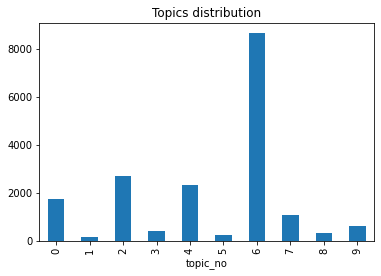

In [10]:
df.groupby('topic_no').size().plot(kind='bar', title='Topics distribution')